In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import time





In [137]:

columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
         "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
         "hours-per-week", "native-country", "income"]
data = pd.read_csv('adult.data', header=None, names=columns)

In [138]:
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [139]:
for column in columns:
    print(column,':', data[column].unique(), '\n')

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt : [ 77516  83311 215646 ...  34066  84661 257302] 

education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Fa

In [140]:
# discard spaces from entries
for column in data.columns:
    if data[column].dtype == "object":
        data[column] = data[column].str.strip()

Data Stats

In [141]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [142]:
data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [143]:
print(data.describe())

# Remove outliers from the 'age' column
data = data[(data['age'] >= 18) & (data['age'] <= 80)]

# Remove outliers from the 'hours-per-week' column
data = data[(data['hours-per-week'] >= 10)]

print(data.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
                age        fnlwgt  education-num  capital-gain 

# Missing values

In [144]:
data[data == '?'] = np.nan
data.isnull().sum()


age                  0
workclass         1603
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1608
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     572
income               0
dtype: int64

In [145]:
# Filling missing values with the most frequent value

data['workclass'].fillna(data['workclass'].mode()[0],inplace = True)
data['occupation'].fillna(data['occupation'].mode()[0],inplace = True)
data['native-country'].fillna(data['native-country'].mode()[0],inplace = True)
data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [146]:
# To check duplicates and remove it
print(" duplicates in the data:", data.duplicated().sum())
data = data[~data.duplicated()]
print("After removing duplicates:", data.duplicated().sum())

 duplicates in the data: 23
After removing duplicates: 0


In [147]:
# create\ing new feature "education_level"
data['education_level'] = data['education'] + '_' + data['education-num'].astype(str)

# Data Exploration

In [148]:
data.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,31630.000000,3.163000e+04,31630.000000,31630.000000,31630.000000,31630.000000
mean,38.578438,1.900133e+05,10.127253,1098.543977,88.074866,41.167626
std,13.098296,1.054496e+05,2.552040,7479.983163,403.964676,11.540634
min,18.000000,1.228500e+04,1.000000,0.000000,0.000000,10.000000
25%,28.000000,1.179312e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.786870e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.374542e+05,13.000000,0.000000,0.000000,45.000000
max,80.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [149]:
data.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.078912,0.013522,0.079928,0.056489,0.085078
fnlwgt,-0.078912,1.000000,-0.046749,-0.000130,-0.009727,-0.025675
education-num,0.013522,-0.046749,1.000000,0.122437,0.079627,0.133613
capital-gain,0.079928,-0.000130,0.122437,1.000000,-0.032021,0.078307
capital-loss,0.056489,-0.009727,0.079627,-0.032021,1.000000,0.054663
hours-per-week,0.085078,-0.025675,0.133613,0.078307,0.054663,1.000000


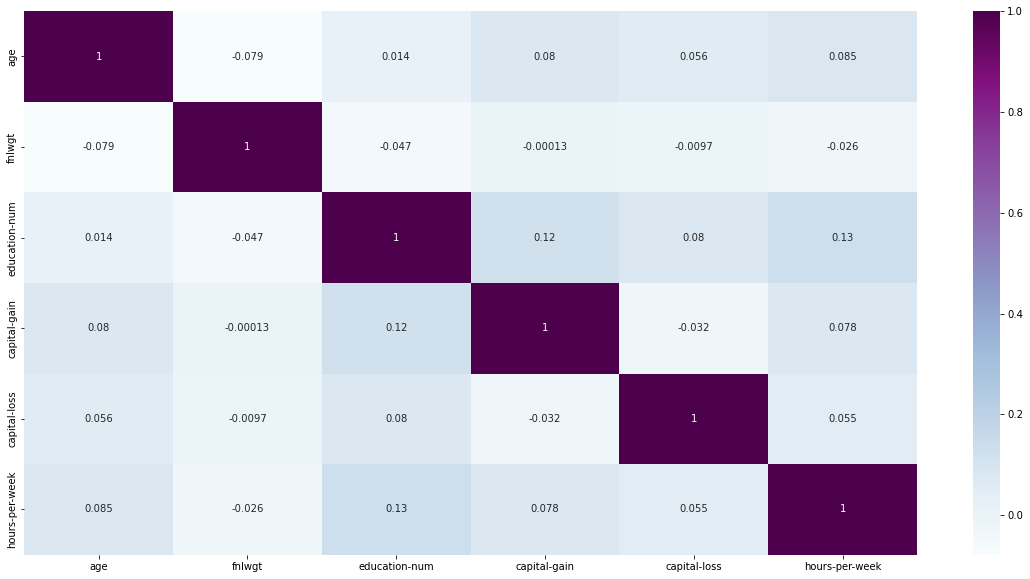

In [150]:
#Heat map for correlation

plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot = True, cmap="BuPu")
plt.show()
plt.close()

There is not a great correlation between the numerical features.

The correlation of fnlwgt gives a negative value so this can be dropped

There is some correlation between education-num and capital loss,

and education-num and capital gain.

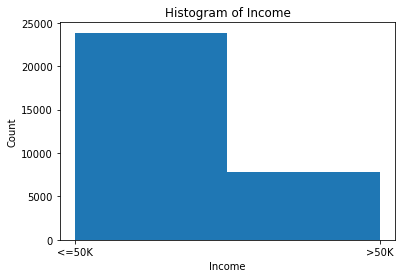

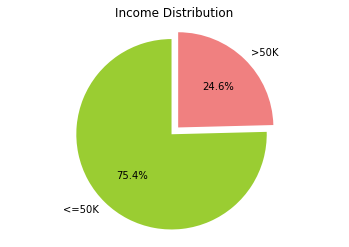

In [151]:

# Histogram of income
plt.hist(data['income'], bins=2)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income')
plt.show()

# Pie chart of income distribution
income_counts = data['income'].value_counts()
labels = ['<=50K', '>50K']
colors = ['yellowgreen', 'lightcoral']
explode = (0, 0.1)

plt.pie(income_counts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Income Distribution')
plt.show()

From the above chart it can be noticed that income with <=50k are  75.9%

In [152]:
data.drop('fnlwgt', axis=1, inplace=True)

# Preprocessing the data


In [153]:
#transforming categorical into binary variables

label_encoder = preprocessing.LabelEncoder()
columns = ['workclass', 'education', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'native-country','education_level']

# Loop through the columns and encode each one
for column in columns:
    data[column]= label_encoder.fit_transform(data[column])

In [154]:
# Partioning the data
X = data.drop('income', axis=1)
y = data['income']


# TRAIN-TEST SPLIT


In [155]:
# Splitting to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model building and  Comparision of Decision Tree and Knn



In [156]:
def evaluate(actual, pred):
    
    confusion_matrix = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion_matrix.loc['>50K','>50K']
    TN = confusion_matrix.loc['<=50K','<=50K']
    FP = confusion_matrix.loc['<=50K','>50K']
    FN = confusion_matrix.loc['>50K','<=50K']

    accuracy = (TP+TN)/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    error_rate = 1 - accuracy
    
    model_dict = {}
    model_dict['accuracy'] =  accuracy
    model_dict['precision'] = precision
    model_dict['recall'] = recall
    model_dict['f_measure'] = f_measure
    model_dict['error_rate'] = error_rate
    
    return model_dict

In [157]:
#Decision tree
dt_start_time = time.time()

dt_model = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=22)
dt_model.fit(x_train, y_train)

dt_train_pred = dt_model.predict(x_train)
dt_test_pred = dt_model.predict(x_test)

print(f'Train score: {accuracy_score(y_train, dt_train_pred) *100:.2f}%')
print(f'Test score: {accuracy_score(y_test, dt_test_pred) *100:.2f}%')

dt_eval = evaluate(y_test, dt_test_pred)
dt_df = round(pd.DataFrame([dt_eval], index = ['Decision Tree']),4)
display(dt_df)

dt_model_train_time = time.time() - dt_start_time
print(f'time taken - dt: {dt_model_train_time}')


# Evaluating the K-Nearest Neighbors model
Knn_start_time = time.time()

k_range = range(2, 11)
knn_output = []

for val in k_range:
    knn = KNeighborsClassifier(n_neighbors=val, metric = 'manhattan')
    knn.fit(x_train, y_train)
    knn_train_pred = knn.predict(x_train)
    knn_test_pred = knn.predict(x_test)
    knn_eval = evaluate(y_test, knn_test_pred)
    knn_eval['k'] = val
    knn_eval['Train score(%)'] = accuracy_score(y_train, knn_train_pred)*100
    knn_eval['Test score(%)'] = accuracy_score(y_test, knn_test_pred)*100
    knn_output.append(knn_eval)
    
knn_df = round(pd.DataFrame(knn_output),4)
knn_df.set_index('k', inplace = True)
display(knn_df)
knn_model_train_time = time.time() - Knn_start_time
print(f'time taken- Knn: {knn_model_train_time}')



Train score: 85.12%
Test score: 84.62%


,accuracy,precision,recall,f_measure,error_rate
Decision Tree,0.8462,0.7584,0.5304,0.6243,0.1538


time taken - dt: 0.3480644226074219


,accuracy,precision,recall,f_measure,error_rate,Train score(%),Test score(%)
k,,,,,,,
2,0.8392,0.7489,0.4998,0.5995,0.1608,90.8179,83.9182
3,0.8361,0.6661,0.6407,0.6531,0.1639,90.4611,83.6126
4,0.8477,0.7518,0.5488,0.6345,0.1523,89.0610,84.7718
5,0.8461,0.6914,0.6521,0.6712,0.1539,88.8036,84.6138
6,0.8478,0.7404,0.5667,0.6420,0.1522,88.2616,84.7824
7,0.8452,0.6930,0.6411,0.6661,0.1548,87.9319,84.5189
8,0.8491,0.7381,0.5786,0.6487,0.1509,87.7151,84.9088
9,0.8473,0.7027,0.6341,0.6667,0.1527,87.7196,84.7297
10,0.8496,0.7373,0.5834,0.6514,0.1504,87.4712,84.9615


time taken- Knn: 130.90166568756104


When k = 10, it gives the best accuracy.

Taking k = 10,

In [158]:
Knn_start_time = time.time()

knn_model = KNeighborsClassifier(n_neighbors=10 , metric = 'manhattan') 
knn_model.fit(x_train, y_train)

knn_train_pred = knn_model.predict(x_train)
knn_test_pred = knn_model.predict(x_test)

print(f'Train score: {accuracy_score(y_train, knn_train_pred)*100:.2f}%')
print(f'Test score: {accuracy_score(y_test, knn_test_pred)*100:.2f}%')

knn_eval = evaluate(y_test, knn_test_pred)
knn_df = round(pd.DataFrame([knn_eval], index = ['k Nearest Neighbour']),4)
display(knn_df)
knn_model_train_time = time.time() - Knn_start_time
print(f'time taken- Knn: {knn_model_train_time}')

Train score: 87.47%
Test score: 84.96%


,accuracy,precision,recall,f_measure,error_rate
k Nearest Neighbour,0.8496,0.7373,0.5834,0.6514,0.1504


time taken- Knn: 20.094292640686035
